<a href="https://colab.research.google.com/github/Deepanshi-Gupta/TECHNOHACKS_EDUTECH/blob/main/The_CIFAR_10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Image Classification
Use the CIFAR-10 dataset to build a modelthat can classify images into 10 differentcategories

######Stage 1: Dataset Preparation

Import the CIFAR-10 dataset, which consists of 50,000 training images and 10,000 test images.Preprocess the dataset by normalizing the pixel values between 0 and 1, and optionally perform data augmentation techniques like random flips, rotations, or crops to increase the diversity of training examples.

#####Stage 2: Model Architecture Selection

Choose a suitable architecture for image classification, such as Convolutional Neural Networks (CNNs). CNNs are commonly used for image classification tasks due to their ability to capture spatial hierarchies and patterns.
Start with a simple architecture like a basic CNN, and gradually increase the complexity if needed.

######Stage 3: Model Definition and Compilation

Define the chosen model architecture using a deep learning framework such as TensorFlow or PyTorch. Compile the model by specifying the loss function (e.g., categorical cross-entropy) and the optimization algorithm (e.g., Adam).

######Stage 4: Model Training

Split the preprocessed dataset into training and validation sets.
Train the model on the training set using the compiled model and the chosen optimization algorithm. Monitor the model's performance on the validation set during training to detect overfitting or underfitting.

######Stage 5: Model Evaluation

Evaluate the trained model on the test set to obtain the final performance metrics, such as accuracy, precision, recall, and F1 score. Analyze the model's performance to identify areas for improvement, such as adjusting hyperparameters or modifying the model architecture.

# CODE

In [2]:
pip install tensorflow

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10


In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
print('y_train_shape:',y_train.shape)

y_train_shape: (50000, 1)


In [5]:
y_train[:10]


array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [6]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

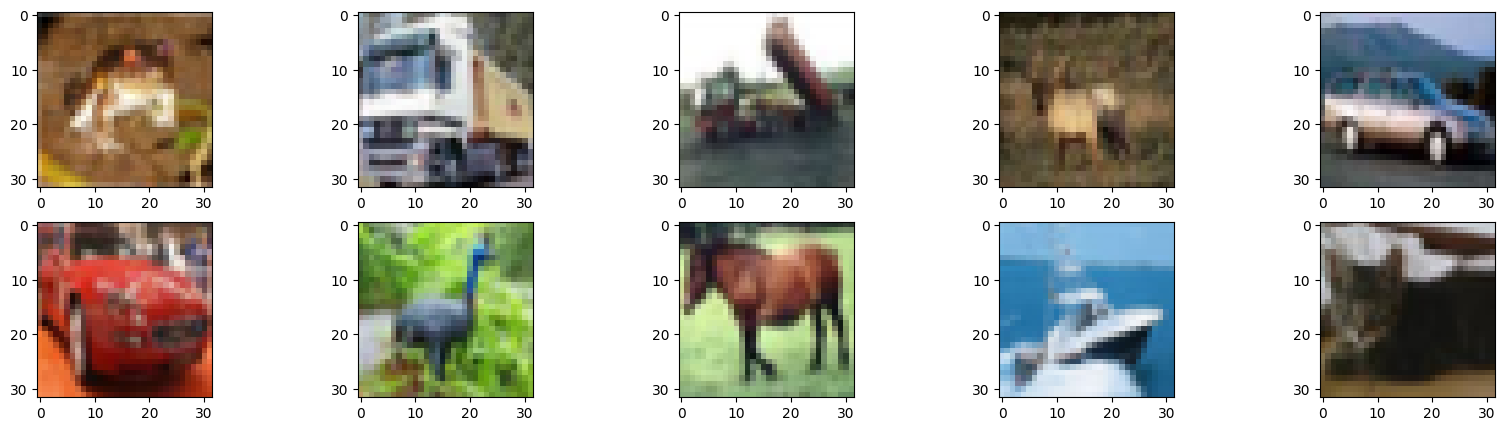

In [7]:
import matplotlib.pyplot as plt
# visualization classes
plt.figure(figsize=(20,5))
for i,x in enumerate(range(10)):
 plt.subplot(2,5,i+1)
 plt.imshow(x_train[x])
plt.show()


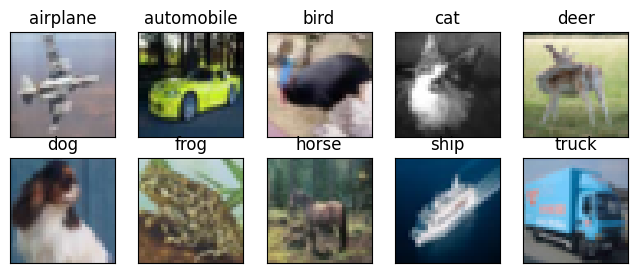

In [8]:
# plotting some random 10 images
import numpy as np

class_names = ['airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(10):
 ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
 idx = np.where(y_train[:]==i)[0]
 features_idx = x_train[idx,::]
 img_num = np.random.randint(features_idx.shape[0])
 im = (features_idx[img_num,::])
 ax.set_title(class_names[i])
 plt.imshow(im)
plt.show()

In [9]:
print('y_train_shape before converting the binaary class metrics',y_train.shape)
y_train

y_train_shape before converting the binaary class metrics (50000, 1)


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
print('y_test_shape before converting the binaary class metrics',y_test.shape)
y_train

y_test_shape before converting the binaary class metrics (10000, 1)


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [13]:
print('y_train_shape after converting the binaary class metrics',y_train.shape)
y_train

y_train_shape after converting the binaary class metrics (50000, 10)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
print('y_test_shape after converting the binaary class metrics',y_test.shape)
y_test


y_test_shape after converting the binaary class metrics (10000, 10)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [15]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
#Stage 2: Model Architecture Selection

from tensorflow.keras import layers, models

# Define a simple CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 10)                72010     
                                                                 
Total params: 72,906
Trainable params: 72,906
Non-trainable params: 0
_________________________________________________________________


In [22]:
#Stage 3: Model Definition and Compilation

model.compile(loss='categorical_crossentropy',
 optimizer='sgd',
 metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the input image
x_train /= 255
x_test /= 255

In [23]:
#step 4
# Training the model
model.fit(x_train, y_train,
 batch_size=batch_size,
 epochs=epochs,
 validation_data=(x_test, y_test),
 shuffle=True)

Epoch 1/10
782/782 [==============================] - 36s 45ms/step - loss: 2.3026 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1006
Epoch 2/10
782/782 [==============================] - 33s 42ms/step - loss: 2.3026 - accuracy: 0.0986 - val_loss: 2.3025 - val_accuracy: 0.1464
Epoch 3/10
782/782 [==============================] - 35s 45ms/step - loss: 2.3026 - accuracy: 0.1014 - val_loss: 2.3025 - val_accuracy: 0.1040
Epoch 4/10
782/782 [==============================] - 34s 44ms/step - loss: 2.3026 - accuracy: 0.1005 - val_loss: 2.3025 - val_accuracy: 0.1000
Epoch 5/10
782/782 [==============================] - 33s 43ms/step - loss: 2.3026 - accuracy: 0.0995 - val_loss: 2.3025 - val_accuracy: 0.1000
Epoch 6/10
782/782 [==============================] - 35s 45ms/step - loss: 2.3026 - accuracy: 0.0990 - val_loss: 2.3025 - val_accuracy: 0.1000
Epoch 7/10
782/782 [==============================] - 37s 48ms/step - loss: 2.3026 - accuracy: 0.1001 - val_loss: 2.3025 - val_accuracy:

In [24]:
#Stage 5: Model Evaluation

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 2.3024 - accuracy: 0.1000
Test Loss: 2.302441120147705
Test Accuracy: 0.10000000149011612
